### Dependencies

In [95]:
import pandas as pd
import numpy as np
import sqlite3
import pickle
from sklearn.cluster import KMeans
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

### Creating SQLite Database

In [96]:
conn = sqlite3.connect(r"data/ml-20m.db")

uncommment cells below inorder to make the actual database, uncomment before final commit for reproducibility. You comment them out so that way each time you run the notebook you arent making the database again. 

In [97]:
#genomescores = pd.read_csv("ml-20m/genome-scores.csv")
#genomescores.head()

In [98]:
#genomescores.to_sql("genomescores", conn, if_exists="replace")

In [99]:
#genometags = pd.read_csv("ml-20m/genome-tags.csv")
#genometags.head()

In [100]:
#genometags.to_sql("genometags", conn, if_exists="replace")

In [101]:
#links = pd.read_csv("ml-20m/links.csv")
#links.head()

In [102]:
#links.to_sql("links", conn, if_exists="replace")

In [103]:
#movies = pd.read_csv("ml-20m/movies.csv")
#movies.head()

In [104]:
#movies.to_sql("movies", conn, if_exists="replace")

In [105]:
#ratings = pd.read_csv("ml-20m/ratings.csv")
#ratings.head()

In [106]:
#ratings.to_sql("ratings", conn, if_exists="replace")

In [107]:
#tags = pd.read_csv("ml-20m/tags.csv")
#tags.head()

In [108]:
#tags.to_sql("tags", conn, if_exists="replace")

### Querying, Loading, and Cleaning Data

In [109]:
model = pd.read_sql_query("""SELECT userId, 
movieid,
rating,
title as titles


FROM ratings INNER JOIN movies USING (movieId)



ORDER BY userId ASC


LIMIT 1000;""", conn)

In [110]:
model.head(10)

,userId,movieId,rating,titles
0,1,2,3.5,Jumanji (1995)
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p..."
2,1,32,3.5,Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
3,1,47,3.5,Seven (a.k.a. Se7en) (1995)
4,1,50,3.5,"Usual Suspects, The (1995)"
5,1,112,3.5,Rumble in the Bronx (Hont faan kui) (1995)
6,1,151,4.0,Rob Roy (1995)
7,1,223,4.0,Clerks (1994)
8,1,253,4.0,Interview with the Vampire: The Vampire Chroni...
9,1,260,4.0,Star Wars: Episode IV - A New Hope (1977)


In [111]:
#modelb = pd.read_csv('data/100k.csv')
#modelb.head(10)

In [112]:
#modelb = modelb.astype(float)

In [113]:
model = model.pivot_table(index = ['userId'], columns='titles', values = 'rating')

In [114]:
model = model.reset_index()
model.head(10)

titles,userId,1984 (Nineteen Eighty-Four) (1984),2001: A Space Odyssey (1968),2010: The Year We Make Contact (1984),28 Days (2000),28 Days Later (2002),"7th Voyage of Sinbad, The (1958)",8MM (1999),A.I. Artificial Intelligence (2001),Abbott and Costello Meet Frankenstein (1948),...,"Wizard of Oz, The (1939)","Wolf Man, The (1941)","X-Files: Fight the Future, The (1998)",X-Men (2000),X2: X-Men United (2003),Yellow Submarine (1968),Yojimbo (1961),You've Got Mail (1998),Young Frankenstein (1974),¡Three Amigos! (1986)
0,1,NaN,3.5,NaN,NaN,3.5,4.0,NaN,NaN,NaN,...,3.5,NaN,NaN,NaN,4.0,NaN,3.0,NaN,4.0,NaN
1,2,NaN,5.0,NaN,3.0,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,5.0,5.0,4.0,NaN,NaN,NaN,4.0,NaN,NaN,...,4.0,NaN,5.0,NaN,NaN,3.0,NaN,NaN,5.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,NaN,3.0,3.0,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,4.0,NaN,4.0,NaN,NaN,NaN,3.0,NaN,2.0
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
for column in model:
    model[column].fillna((model[column].mean()), inplace=True)
    
#modelb = modelb.fillna(2.5)
model.head(10)

titles,userId,1984 (Nineteen Eighty-Four) (1984),2001: A Space Odyssey (1968),2010: The Year We Make Contact (1984),28 Days (2000),28 Days Later (2002),"7th Voyage of Sinbad, The (1958)",8MM (1999),A.I. Artificial Intelligence (2001),Abbott and Costello Meet Frankenstein (1948),...,"Wizard of Oz, The (1939)","Wolf Man, The (1941)","X-Files: Fight the Future, The (1998)",X-Men (2000),X2: X-Men United (2003),Yellow Submarine (1968),Yojimbo (1961),You've Got Mail (1998),Young Frankenstein (1974),¡Three Amigos! (1986)
0,1,5.0,3.500,3.5,3.0,3.5,4.0,4.0,2.0,5.0,...,3.50,4.0,5.0,4.0,4.0,3.0,3.0,3.0,4.0,2.0
1,2,5.0,5.000,3.5,3.0,3.5,4.0,4.0,2.0,5.0,...,3.75,4.0,5.0,4.0,4.0,3.0,3.0,3.0,4.5,2.0
2,3,5.0,5.000,4.0,3.0,3.5,4.0,4.0,2.0,5.0,...,4.00,4.0,5.0,4.0,4.0,3.0,3.0,3.0,5.0,2.0
3,4,5.0,4.125,3.5,3.0,3.5,4.0,4.0,2.0,5.0,...,3.75,4.0,5.0,4.0,4.0,3.0,3.0,3.0,4.5,2.0
4,5,5.0,4.125,3.5,3.0,3.5,4.0,4.0,2.0,5.0,...,3.75,4.0,5.0,4.0,4.0,3.0,3.0,3.0,4.5,2.0
5,6,5.0,4.125,3.5,3.0,3.5,4.0,4.0,2.0,5.0,...,3.75,4.0,5.0,4.0,4.0,3.0,3.0,3.0,4.5,2.0
6,7,5.0,3.000,3.0,3.0,3.5,4.0,4.0,2.0,5.0,...,3.75,4.0,5.0,4.0,4.0,3.0,3.0,3.0,4.5,2.0
7,8,5.0,4.125,3.5,3.0,3.5,4.0,4.0,2.0,5.0,...,3.75,4.0,5.0,4.0,4.0,3.0,3.0,3.0,4.5,2.0
8,9,5.0,4.125,3.5,3.0,3.5,4.0,4.0,2.0,5.0,...,3.75,4.0,5.0,4.0,4.0,3.0,3.0,3.0,4.5,2.0
9,10,5.0,4.125,3.5,3.0,3.5,4.0,4.0,2.0,5.0,...,3.75,4.0,5.0,4.0,4.0,3.0,3.0,3.0,4.5,2.0


In [116]:
model = model.drop(columns=['userId'])

In [117]:
model.head(15)

titles,1984 (Nineteen Eighty-Four) (1984),2001: A Space Odyssey (1968),2010: The Year We Make Contact (1984),28 Days (2000),28 Days Later (2002),"7th Voyage of Sinbad, The (1958)",8MM (1999),A.I. Artificial Intelligence (2001),Abbott and Costello Meet Frankenstein (1948),"Abyss, The (1989)",...,"Wizard of Oz, The (1939)","Wolf Man, The (1941)","X-Files: Fight the Future, The (1998)",X-Men (2000),X2: X-Men United (2003),Yellow Submarine (1968),Yojimbo (1961),You've Got Mail (1998),Young Frankenstein (1974),¡Three Amigos! (1986)
0,5.0,3.500,3.5,3.0,3.5,4.0,4.0,2.0,5.0,3.0,...,3.50,4.0,5.0,4.0,4.0,3.0,3.0,3.0,4.0,2.0
1,5.0,5.000,3.5,3.0,3.5,4.0,4.0,2.0,5.0,3.0,...,3.75,4.0,5.0,4.0,4.0,3.0,3.0,3.0,4.5,2.0
2,5.0,5.000,4.0,3.0,3.5,4.0,4.0,2.0,5.0,3.0,...,4.00,4.0,5.0,4.0,4.0,3.0,3.0,3.0,5.0,2.0
3,5.0,4.125,3.5,3.0,3.5,4.0,4.0,2.0,5.0,3.0,...,3.75,4.0,5.0,4.0,4.0,3.0,3.0,3.0,4.5,2.0
4,5.0,4.125,3.5,3.0,3.5,4.0,4.0,2.0,5.0,3.0,...,3.75,4.0,5.0,4.0,4.0,3.0,3.0,3.0,4.5,2.0
5,5.0,4.125,3.5,3.0,3.5,4.0,4.0,2.0,5.0,3.0,...,3.75,4.0,5.0,4.0,4.0,3.0,3.0,3.0,4.5,2.0
6,5.0,3.000,3.0,3.0,3.5,4.0,4.0,2.0,5.0,3.0,...,3.75,4.0,5.0,4.0,4.0,3.0,3.0,3.0,4.5,2.0
7,5.0,4.125,3.5,3.0,3.5,4.0,4.0,2.0,5.0,3.0,...,3.75,4.0,5.0,4.0,4.0,3.0,3.0,3.0,4.5,2.0
8,5.0,4.125,3.5,3.0,3.5,4.0,4.0,2.0,5.0,3.0,...,3.75,4.0,5.0,4.0,4.0,3.0,3.0,3.0,4.5,2.0
9,5.0,4.125,3.5,3.0,3.5,4.0,4.0,2.0,5.0,3.0,...,3.75,4.0,5.0,4.0,4.0,3.0,3.0,3.0,4.5,2.0


### Building Machine Learning Model

In [118]:
test, train = np.split(model, [int(.2*len(model))])
train.head(10)

titles,1984 (Nineteen Eighty-Four) (1984),2001: A Space Odyssey (1968),2010: The Year We Make Contact (1984),28 Days (2000),28 Days Later (2002),"7th Voyage of Sinbad, The (1958)",8MM (1999),A.I. Artificial Intelligence (2001),Abbott and Costello Meet Frankenstein (1948),"Abyss, The (1989)",...,"Wizard of Oz, The (1939)","Wolf Man, The (1941)","X-Files: Fight the Future, The (1998)",X-Men (2000),X2: X-Men United (2003),Yellow Submarine (1968),Yojimbo (1961),You've Got Mail (1998),Young Frankenstein (1974),¡Three Amigos! (1986)
2,5.0,5.000,4.0,3.0,3.5,4.0,4.0,2.0,5.0,3.0,...,4.00,4.0,5.0,4.0,4.0,3.0,3.0,3.0,5.0,2.0
3,5.0,4.125,3.5,3.0,3.5,4.0,4.0,2.0,5.0,3.0,...,3.75,4.0,5.0,4.0,4.0,3.0,3.0,3.0,4.5,2.0
4,5.0,4.125,3.5,3.0,3.5,4.0,4.0,2.0,5.0,3.0,...,3.75,4.0,5.0,4.0,4.0,3.0,3.0,3.0,4.5,2.0
5,5.0,4.125,3.5,3.0,3.5,4.0,4.0,2.0,5.0,3.0,...,3.75,4.0,5.0,4.0,4.0,3.0,3.0,3.0,4.5,2.0
6,5.0,3.000,3.0,3.0,3.5,4.0,4.0,2.0,5.0,3.0,...,3.75,4.0,5.0,4.0,4.0,3.0,3.0,3.0,4.5,2.0
7,5.0,4.125,3.5,3.0,3.5,4.0,4.0,2.0,5.0,3.0,...,3.75,4.0,5.0,4.0,4.0,3.0,3.0,3.0,4.5,2.0
8,5.0,4.125,3.5,3.0,3.5,4.0,4.0,2.0,5.0,3.0,...,3.75,4.0,5.0,4.0,4.0,3.0,3.0,3.0,4.5,2.0
9,5.0,4.125,3.5,3.0,3.5,4.0,4.0,2.0,5.0,3.0,...,3.75,4.0,5.0,4.0,4.0,3.0,3.0,3.0,4.5,2.0
10,5.0,4.125,3.5,3.0,3.5,4.0,4.0,2.0,5.0,3.0,...,3.75,4.0,5.0,4.0,4.0,3.0,3.0,3.0,4.5,2.0


#### DO NOT RUN CELL BELOW UNLESS YOU HAVE SOME TIME, TAKES AROUND 3 HOURS TO RUN

In [119]:

#kmeans = KMeans(n_clusters=18, random_state=0).fit(modelb)

Nc = range(1, 15, 5)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = []

for i in range(len(Nc)):
    #comment out line directly below to speed up
    #print(kmeans[i].fit(model).score(model))
    score.append(kmeans[i].fit(model).score(model))
    print("Running cluster #:",i)
    
print(" ")
print("DONE!")

Running cluster #: 0
Running cluster #: 1
Running cluster #: 2
 
DONE!


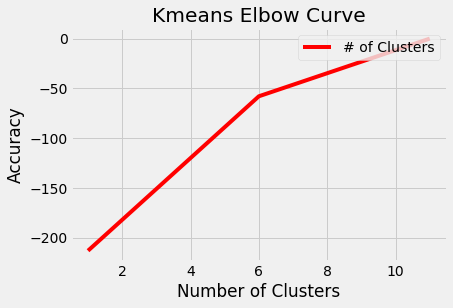

In [120]:
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')


plt.plot(Nc, score, 'r-')

plt.legend(['# of Clusters','Accuracy'], loc = 'upper right')
plt.xlabel('Number of Clusters')
plt.ylabel('Accuracy')
plt.title('Kmeans Elbow Curve')

plt.show()

#fig.savefig('images/kmeanselbow.png')


In [121]:
print("heello")

heello


### Setting Number of Clusters

In [122]:
#not sure why I would have the random state. Ask Dr. Paul about that
#kmeans = KMeans(n_clusters=18).fit(modelb)
kmeans = KMeans(n_clusters=10, random_state=0).fit(model)

In [123]:
modelsize = len(model.columns)
modelsize

698

### Creating a Fake User with Fake Ratings

In [124]:
#creates a fake user with random ratings
userratings = np.random.randint(low = 0, high = 5, size=modelsize)
userratings = [userratings]
userratings

[array([2, 1, 3, 3, 1, 4, 3, 0, 4, 3, 1, 3, 3, 2, 2, 2, 0, 0, 0, 4, 3, 0,
        2, 2, 0, 3, 0, 0, 3, 3, 4, 0, 4, 1, 3, 0, 0, 4, 0, 0, 4, 1, 2, 2,
        4, 2, 2, 1, 0, 2, 1, 2, 1, 4, 2, 0, 3, 1, 4, 0, 0, 3, 2, 0, 0, 2,
        1, 3, 0, 2, 0, 2, 2, 4, 2, 1, 0, 3, 1, 0, 1, 1, 4, 2, 1, 3, 1, 4,
        3, 2, 4, 0, 1, 1, 0, 4, 2, 0, 1, 3, 3, 4, 0, 1, 3, 1, 3, 0, 3, 3,
        2, 4, 0, 4, 3, 4, 4, 1, 0, 3, 2, 3, 2, 2, 1, 3, 3, 4, 4, 0, 3, 2,
        1, 0, 0, 4, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 4, 3, 3, 1, 2, 4, 1, 3,
        4, 0, 4, 0, 4, 3, 4, 1, 3, 2, 0, 3, 2, 2, 2, 4, 3, 4, 1, 0, 2, 0,
        2, 4, 3, 1, 0, 3, 2, 3, 4, 4, 0, 4, 4, 0, 3, 1, 3, 4, 1, 4, 0, 3,
        4, 0, 4, 0, 2, 0, 1, 2, 1, 2, 2, 1, 3, 1, 2, 4, 3, 2, 0, 3, 4, 4,
        0, 4, 3, 3, 3, 0, 2, 0, 0, 1, 1, 0, 1, 1, 4, 2, 0, 2, 2, 0, 1, 2,
        2, 3, 3, 0, 1, 3, 2, 3, 4, 4, 0, 2, 3, 2, 2, 3, 2, 1, 1, 0, 1, 2,
        4, 4, 4, 2, 4, 1, 4, 3, 3, 0, 0, 2, 1, 3, 0, 3, 3, 0, 2, 0, 3, 3,
        2, 3, 2, 2, 4, 3, 0, 4, 3, 4, 

In [125]:
#predict's what cluster our fake user is in
userscluster = kmeans.predict(userratings)
userscluster = userscluster[0]
userscluster

6

In [126]:
prediction = kmeans.cluster_centers_[userscluster]
prediction

array([5.        , 3.5       , 3.5       , 3.        , 3.5       ,
       4.        , 4.        , 2.        , 5.        , 3.        ,
       2.        , 3.25      , 2.5       , 4.        , 4.        ,
       4.        , 2.        , 3.        , 4.        , 3.5       ,
       4.        , 3.        , 4.        , 3.        , 4.        ,
       3.        , 3.        , 2.        , 3.        , 1.        ,
       4.        , 4.        , 4.        , 4.33333333, 4.        ,
       5.        , 5.        , 4.        , 4.        , 3.5       ,
       4.66666667, 3.        , 3.        , 4.        , 4.        ,
       3.        , 4.        , 3.        , 3.5       , 2.        ,
       3.5       , 2.        , 4.66666667, 3.5       , 3.5       ,
       3.        , 3.        , 3.5       , 4.        , 2.        ,
       4.        , 3.25      , 3.        , 2.        , 3.        ,
       3.        , 4.        , 4.        , 4.        , 3.        ,
       4.        , 5.        , 3.        , 3.        , 4.     

In [127]:
sort_index = np.argsort(prediction)
top20 = sort_index[-21:-1]
top20

array([182, 196, 211, 588, 580, 227, 229, 576, 240, 244, 246, 248, 562,
       561, 256, 260, 261, 262, 275, 284])

In [128]:
movietitles = model.columns
movietitles

Index(['1984 (Nineteen Eighty-Four) (1984)', '2001: A Space Odyssey (1968)',
       '2010: The Year We Make Contact (1984)', '28 Days (2000)',
       '28 Days Later (2002)', '7th Voyage of Sinbad, The (1958)',
       '8MM (1999)', 'A.I. Artificial Intelligence (2001)',
       'Abbott and Costello Meet Frankenstein (1948)', 'Abyss, The (1989)',
       ...
       'Wizard of Oz, The (1939)', 'Wolf Man, The (1941)',
       'X-Files: Fight the Future, The (1998)', 'X-Men (2000)',
       'X2: X-Men United (2003)', 'Yellow Submarine (1968)', 'Yojimbo (1961)',
       'You've Got Mail (1998)', 'Young Frankenstein (1974)',
       '¡Three Amigos! (1986)'],
      dtype='object', name='titles', length=698)

### Fake User's Top 20 Recomendations

In [129]:
for i in top20:
    print(movietitles[i])

Duck Soup (1933)
Escape from New York (1981)
Fantastic Voyage (1966)
Starship Troopers (1997)
Star Trek: First Contact (1996)
Flashdance (1983)
Flight of the Navigator (1986)
Star Trek III: The Search for Spock (1984)
Freaks (1932)
Friday the 13th (1980)
From Dusk Till Dawn (1996)
Fugitive, The (1993)
Soylent Green (1973)
Sound of Music, The (1965)
Gladiator (2000)
Godfather, The (1972)
Godfather: Part II, The (1974)
Gods Must Be Crazy, The (1980)
Goodfellas (1990)
Grumpy Old Men (1993)


### Saving The Model Using Pickle

In [130]:
with open('flask-app/kmeans.pkl', 'wb') as fid:
    pickle.dump(kmeans, fid,2)  

In [131]:
"""#Save a dictionary of the index keys to make the dummy variables out of user input

#create a dataframe containing only the categorical variables. In our case, it is the entire dataset except the ARR_DELAY column
cat = model

index_dict = dict(zip(cat.columns,range(cat.shape[1])))

#Save the index_dict into disk
with open('flask-app/cat', 'wb') as fid:
    pickle.dump(index_dict, fid,2) """

"#Save a dictionary of the index keys to make the dummy variables out of user input\n\n#create a dataframe containing only the categorical variables. In our case, it is the entire dataset except the ARR_DELAY column\ncat = model\n\nindex_dict = dict(zip(cat.columns,range(cat.shape[1])))\n\n#Save the index_dict into disk\nwith open('flask-app/cat', 'wb') as fid:\n    pickle.dump(index_dict, fid,2) "

### Saving the Title & Average of Every Movie

In [132]:
movies = list(zip())

for column in model:
    i = {'title':column, 'average':model[column].mean()}
    movies.append(dict(i))

In [133]:
movies[0:10]

[{'average': 5.0, 'title': '1984 (Nineteen Eighty-Four) (1984)'},
 {'average': 4.125, 'title': '2001: A Space Odyssey (1968)'},
 {'average': 3.5, 'title': '2010: The Year We Make Contact (1984)'},
 {'average': 3.0, 'title': '28 Days (2000)'},
 {'average': 3.5, 'title': '28 Days Later (2002)'},
 {'average': 4.0, 'title': '7th Voyage of Sinbad, The (1958)'},
 {'average': 4.0, 'title': '8MM (1999)'},
 {'average': 2.0, 'title': 'A.I. Artificial Intelligence (2001)'},
 {'average': 5.0, 'title': 'Abbott and Costello Meet Frankenstein (1948)'},
 {'average': 3.0, 'title': 'Abyss, The (1989)'}]

In [134]:
with open('flask-app/movies', 'wb') as fid:
    pickle.dump(movies, fid,2) 

In [135]:
len(movies)

698

In [137]:
with open('flask-app/movies','rb') as fid:
    movies2 = pickle.load(fid)

In [139]:
movies2[:15]

[{'average': 5.0, 'title': '1984 (Nineteen Eighty-Four) (1984)'},
 {'average': 4.125, 'title': '2001: A Space Odyssey (1968)'},
 {'average': 3.5, 'title': '2010: The Year We Make Contact (1984)'},
 {'average': 3.0, 'title': '28 Days (2000)'},
 {'average': 3.5, 'title': '28 Days Later (2002)'},
 {'average': 4.0, 'title': '7th Voyage of Sinbad, The (1958)'},
 {'average': 4.0, 'title': '8MM (1999)'},
 {'average': 2.0, 'title': 'A.I. Artificial Intelligence (2001)'},
 {'average': 5.0, 'title': 'Abbott and Costello Meet Frankenstein (1948)'},
 {'average': 3.0, 'title': 'Abyss, The (1989)'},
 {'average': 2.0, 'title': 'Accidental Tourist, The (1988)'},
 {'average': 3.25, 'title': 'Ace Ventura: Pet Detective (1994)'},
 {'average': 2.5, 'title': 'Ace Ventura: When Nature Calls (1995)'},
 {'average': 4.0, 'title': 'Addams Family Values (1993)'},
 {'average': 4.0, 'title': 'Adventures of Baron Munchausen, The (1988)'}]

In [147]:
movies_dict = dict(zip())

for column in model:
    #i = {'title':column, 'average':model[column].mean()}
    movies_dict[column] = float(model[column].mean())

movies_dict

{'1984 (Nineteen Eighty-Four) (1984)': 5.0,
 '2001: A Space Odyssey (1968)': 4.125,
 '2010: The Year We Make Contact (1984)': 3.5,
 '28 Days (2000)': 3.0,
 '28 Days Later (2002)': 3.5,
 '7th Voyage of Sinbad, The (1958)': 4.0,
 '8MM (1999)': 4.0,
 'A.I. Artificial Intelligence (2001)': 2.0,
 'Abbott and Costello Meet Frankenstein (1948)': 5.0,
 'Abyss, The (1989)': 3.0,
 'Accidental Tourist, The (1988)': 2.0,
 'Ace Ventura: Pet Detective (1994)': 3.25,
 'Ace Ventura: When Nature Calls (1995)': 2.5,
 'Addams Family Values (1993)': 4.0,
 'Adventures of Baron Munchausen, The (1988)': 4.0,
 'Adventures of Buckaroo Banzai Across the 8th Dimension, The (1984)': 4.0,
 'Adventures of Rocky and Bullwinkle, The (2000)': 2.0,
 'Affair to Remember, An (1957)': 3.0,
 'African Queen, The (1951)': 4.0,
 'Airplane! (1980)': 3.5,
 'Aladdin (1992)': 4.0,
 'Ali (2001)': 3.0,
 'Alien (1979)': 4.666666666666666,
 'Alien Nation (1988)': 3.0,
 'Aliens (1986)': 4.0,
 'All Dogs Go to Heaven 2 (1996)': 3.0,
 'A

In [145]:
with open('flask-app/movies_dict','wb') as fid:
    pickle.dump(movies_dict, fid,2) 